# This Final Notebook aggregates everything with lots of wikipedia pages

#### You will find some documenting about the whole project in conclusion of this notebook

## 1. Initialize

In [1]:
import os
os.chdir("..")  # Move up one directory
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset
import wikipediaapi
import spacy
from sklearn.preprocessing import StandardScaler
from models.autoencoder import AutoEncoder
import torch.nn as nn
from models.word2vec import Word2Vec
from utils.utils import word2vecFineTuning, DataSamplization, evaluate_word_similarity, plot_similarity_comparison, PCA_visualize_embeddings, tSNE_visualize_embeddings

dataSamplization = DataSamplization()
user_agent = "WikipediaAPI/0.5 (Academic Project; rayan.hanader@gmail.com)"
wiki_fr = wikipediaapi.Wikipedia(language='fr', extract_format=wikipediaapi.ExtractFormat.WIKI, user_agent=user_agent)



Loading saved FastText model...


## 1. AI-related training data

Fetching articles from Wikipedia... Please wait...
Articles fetched and saved in data/wikipediaDump

Processing the articles... Please wait...
Articles processed and saved in data/preprocessedWikiDump/preprocessedWikiDump.txt

-------------- TOTAL NUMBER OF EMBEDDINGS : 21408 --------------



/var/folders/fw/pdp1gm7s2snc095m56hvhtpm0000gn/T/ipykernel_42185/3680514708.py:207: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  autoEncoder.load_state_dict(torch.load('dat

Passing the embeddings through the AutoEncoder... Please wait...
Embeddings reduced by the AutoEncoder

Embeddings saved in data/modelsSavedLocally/wikipedia/30dim_embeddings_ArraySimple.npy
Embeddings saved in data/modelsSavedLocally/wikipedia/30dim_embeddings_DictWithWords.npy
Word pairs saved

Fine-tuning the Embeddings... please wait...


/Users/hdrrayan/Documents/COURS/GALATASARAY/Artificial Neural Networks/French-reducted-word-embedding/French-reducted-word-embedding/venv/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [1/500], Loss: 71.2439
Epoch [25/500], Loss: 5.8619
Epoch [50/500], Loss: 5.0306
Early stopping triggered at epoch 51.
Fine-tuning completed.

Evaluating and plotting the embeddings... Please wait...
Missing word pair: optimisés, améliorées
Missing word pair: optimisés, améliorées
Missing word pair: optimisés, améliorées


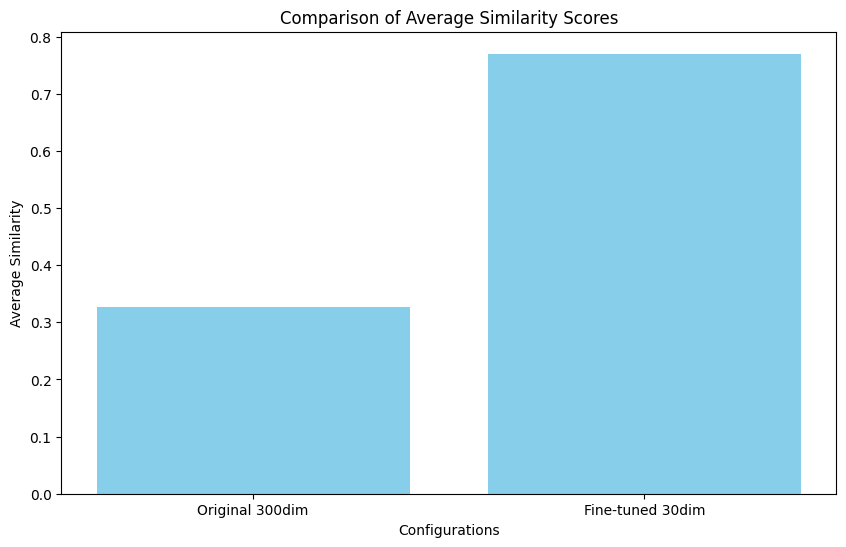

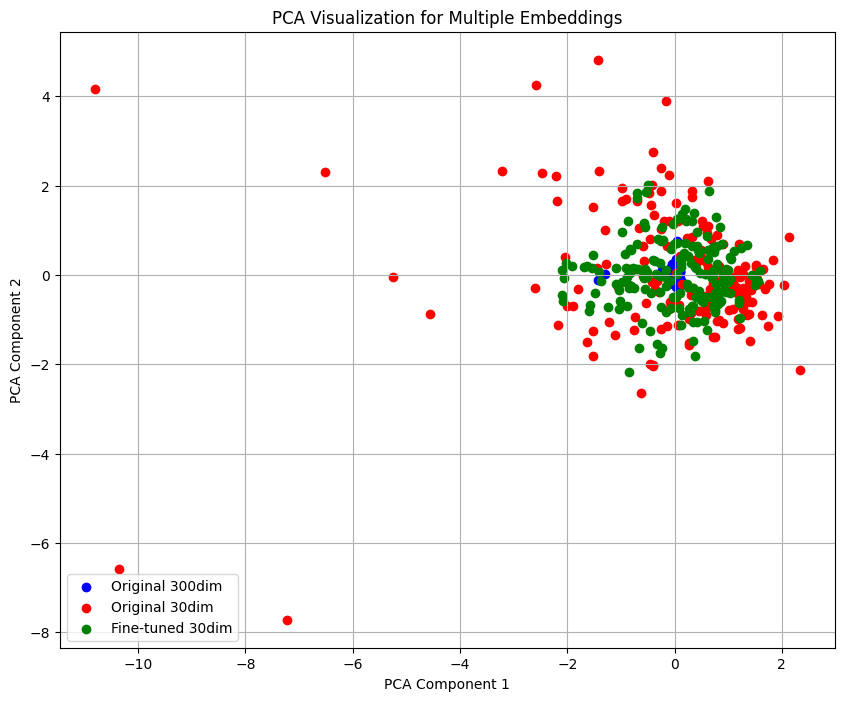

/Users/hdrrayan/Documents/COURS/GALATASARAY/Artificial Neural Networks/French-reducted-word-embedding/French-reducted-word-embedding/venv/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
Python(42226) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
/Users/hdrrayan/Documents/COURS/GALATASARAY/Artificial Neural Networks/French-reducted-word-embedding/French-reducted-word-embedding/venv/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/Users/hdrrayan/Documents/COURS/GALATASARAY/Artificial Neural Networks/French-reducted-word-embedding/French-reducted-word-embedding/venv/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be remov

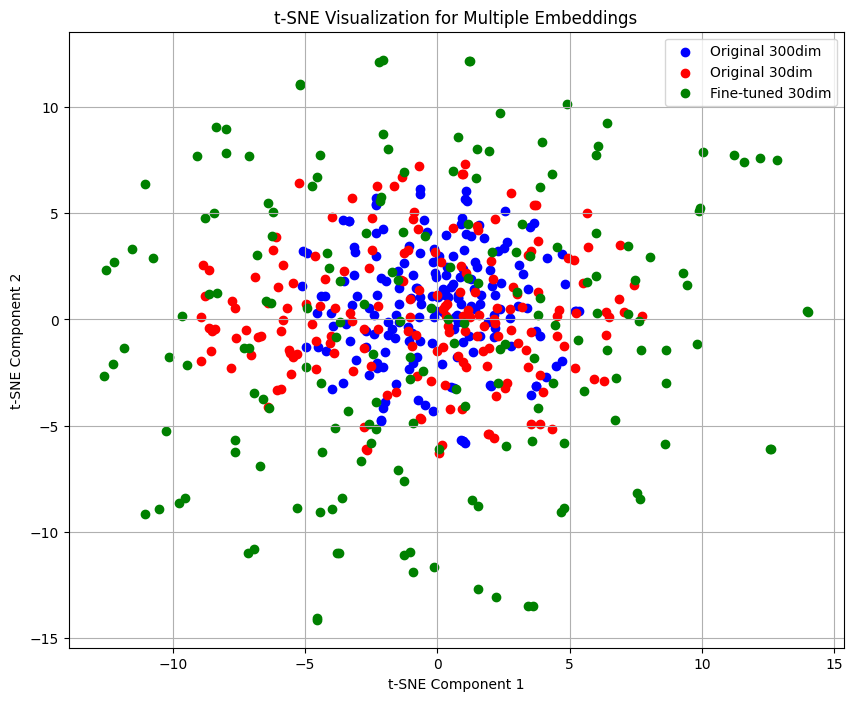

In [2]:
# List of words to test similarity
wordsToTestSimilarity = [
("artificiels", "biologiques"),
("statistiques", "probabiliste"),
("apprentissage", "systèmes"),
("activation", "fonction"),
("apprentissage", "apprenant"),
("méthode", "fonction"),
("neurones", "réseaux"),
("neurones", "artificiels"),
("neurones", "biologiques"),
("réseau", "système"),
("neuronal", "artificiel"),
("conception", "origine"),
("fonctionnement", "méthodes"),
("optimisés", "améliorées"),
("type", "particulier"),
("famille", "classifications"),
("mécanisme", "raisonnement"),
("modélisation", "hypothèses"),
("algorithmes", "sélection"),
("métaphore", "idées"),
("formel", "logiques"),
("automate", "transfert"),
("topologie", "connexions"),
("proactifs", "récurrents"),
("efficacité", "transmission"),
("plasticité", "apprentissage"),
("instar", "modèle"),
("informatique", "programme"),
("paramètres", "coefficients"),
("phase", "apprentissage"),
("classifier", "exemples"),
("physiologiste", "apprentissage"),
("modifier", "valeur"),
("activité", "unités"),
("simple", "permettant"),
("artificiel", "apprendre"),
("expérience", "instructeur"),
("logique", "formel"),
("machines", "informatiques"),
("nombres", "chiffre"),
("perception", "langage"),
("monde", "dispositif"),
("programme", "jeux"),
("technologie", "humain"),
("cerveau", "complexe"),
("pédagogique", "complet"),
("théoriques", "insurmontables"),
("classifieurs", "linéaires"),
("problèmes", "connexité"),
("implicitement", "limitations"),
("impasse", "recherche"),
("adaptative", "évolutive"),
("phénomènes", "évolutifs"),
("intégrés", "adaptatifs"),
("domaine", "télécommunications"),
("souffle", "cadre"),
("rigueur", "physiciens"),
("étude", "acceptable"),
("impossibilité", "problèmes"),
("multicouche", "connectés"),
("rétropropagation", "gradient"),
("entraînement", "pratique"),
("manière", "utilisée"),
("popularisé", "développé"),
("numérique", "calcul"),
("régularisation", "statistique"),
("anticiper", "étudier"),
("surapprentissage", "difficulté"),
("optimisation", "régression"),
("itératives", "gradient"),
("maximisation", "modèles"),
("cachés", "formels"),
("convolutif", "convolution"),
("évoluent", "connecté"),
("alléger", "améliorer"),
("performances", "généralisation"),
("automatique", "codes"),
("réseau", "automatique"),
("acycliques", "feed"),
("motif", "connexion"),
("inspiré", "cortex"),
("chevauchent", "pavage"),
("processus", "biologiques"),
("empilage", "multicouche"),
("prétraiter", "informations"),
("larges", "applications"),
("recommandation", "traitement"),
("impulsions", "utilisation"),
("capacité", "généralisation"),
("généralement", "utilisés"),
("nature", "statistique"),
("réellement", "exemple"),
("espèces", "analyse"),
("image", "reconnaissance"),
("caractères", "ocr"),
("vérifier", "montant"),
("trier", "courrier"),
("déplacement", "automatisé"),
("approximation", "inconnue"),
("accélérée", "exactitude"),
("connue", "complexes")
]

os.makedirs("data/comparaisonDataSet", exist_ok=True)
np.save(file="data/comparaisonDataSet/wordsToTestSimilarity.npy", arr=wordsToTestSimilarity)

# List of topics to fetch from Wikipedia
topics = [
    "Intelligence Artificielle", "Apprentissage automatique", "Apprentissage profond", "Réseau de neurones artificiels",
    "Traitement automatique du langage naturel", "Apprentissage supervisé", "Apprentissage non supervisé",
    "Robot", "Modèle de langage"
]


output_dir = "data/wikipediaDump"
os.makedirs(output_dir, exist_ok=True)

print("Fetching articles from Wikipedia... Please wait...")
for topic in topics:
    page = wiki_fr.page(topic)
    if page.exists():
        with open(f"{output_dir}/{topic.replace(' ', '_')}.txt", "w", encoding="utf-8") as f:
            f.write(page.text)
    else:
        print(f"Article not found: {topic}")

print(f"Articles fetched and saved in {output_dir}\n")

print("Processing the articles... Please wait...")
# Load SpaCy's French language model
nlp = spacy.load("fr_core_news_sm")

# Define directories
input_dir = "data/wikipediaDump"
preprocessed_dir = "data/preprocessedWikiDump"
os.makedirs(preprocessed_dir, exist_ok=True)

def preprocess_text_spacy(text):
    """
    Preprocess the input text using spaCy.
    - Tokenization
    - Lowercasing
    - Stopword removal
    - Removal of non-alphabetic tokens
    """
    # Process text with spaCy
    doc = nlp(text)
    # Filter tokens: keep alphabetic tokens, not stopwords, and in lowercase
    tokens = [token.text.lower() for token in doc if token.is_alpha and not token.is_stop]
    return tokens

# Process each article
words = []
output_path = os.path.join(preprocessed_dir, "preprocessedWikiDump.txt")
for file_name in os.listdir(input_dir):
    input_path = os.path.join(input_dir, file_name)

    if file_name.endswith(".txt"):
        with open(input_path, "r", encoding="utf-8") as f:
            text = f.read()

        # Preprocess the text
        tokens = preprocess_text_spacy(text)
        words+=tokens
print(f"Articles processed and saved in {output_path}\n")


wordIds = dataSamplization.getWordsIds(words)
wordIdsToMatchEmbeds = dataSamplization.getWordsIdsWihtoutRepeat(words)
cp = wordIds.copy()
for i in range(len(cp)-1, -1, -1):
    if cp[i] == -1:
        # Remove the unfound word from the corpus
        words.pop(i)
        wordIds.pop(i)
print(f"-------------- TOTAL NUMBER OF EMBEDDINGS : {len(words)} --------------\n")
cp = wordIdsToMatchEmbeds.copy()
for i in range(len(cp)-1, -1, -1):
    if cp[i] == -1:
        wordIdsToMatchEmbeds.pop(i)
embeddings = dataSamplization.getWordsEmbeddings(words)

# Save the embeddings before reducing as a dict {word : embed}
wordsToMatchEmbeds = []
alreadySeen = []
for word in words:
    if word not in alreadySeen:
        wordsToMatchEmbeds.append(word)
        alreadySeen.append(word)

embedsPath = 'data/modelsSavedLocally/wikipedia/300dim_embeddings_DictWithWords.npy'
embeds300withWords = {word: embeddings[i] for i, word in enumerate(wordsToMatchEmbeds)}
os.makedirs("data/modelsSavedLocally/wikipedia", exist_ok=True)
np.save(embedsPath, embeds300withWords)

# Save the preprocessed articles in a file
with open(output_path, "w", encoding="utf-8") as f:
    f.write(" ".join(words))

scaler = StandardScaler()
best_config = {'hidden_dim1':256, 'hidden_dim2':128, 'learning_rate':0.001, 'batch_size':64}
embedding_matrix = np.array(embeddings)
embedding_matrix_normalized = scaler.fit_transform(embedding_matrix)
embedding_tensor = torch.tensor(embedding_matrix_normalized, dtype=torch.float32)
embedding_dataloader = DataLoader(embedding_tensor, batch_size=best_config['batch_size'], shuffle=False)

autoEncoder = AutoEncoder(input_dim=300, hidden_dim1=best_config['hidden_dim1'], hidden_dim2=best_config['hidden_dim2'], bottleneck_dim=30)
autoEncoder.load_state_dict(torch.load('data/modelsSavedLocally/autoencoder.pth'))

# Get the bottleneck outputs for the embeddings
print("Passing the embeddings through the AutoEncoder... Please wait...")
bottleneck_outputs = []
autoEncoder.eval()
with torch.no_grad():
    for batch in embedding_dataloader:
        outputs = autoEncoder.encoder(batch)
        bottleneck_outputs.append(outputs)
bottleneck_outputs = torch.cat(bottleneck_outputs)
print("Embeddings reduced by the AutoEncoder\n")


# Save the bottleneck outputs
bottleneck_outputs = bottleneck_outputs.detach().numpy()
embeds_with_id = {wordIdsToMatchEmbeds[i]: bottleneck_outputs[i] for i in range(len(wordIdsToMatchEmbeds))}
embedsDictWithWords = {wordsToMatchEmbeds[i] : bottleneck_outputs[i] for i in range(len(wordsToMatchEmbeds))}
cp2 = embeds_with_id.copy()
cp = wordIds.copy()
for idx, (key, embed)  in enumerate(cp2.items()):
    for wordIdsIdx, wordId in enumerate(cp):
        if key == wordId:
            wordIds[wordIdsIdx] = idx
embedsPath = 'data/modelsSavedLocally/wikipedia/30dim_embeddings_ArraySimple.npy'
finalEmbeds = np.array(list(embeds_with_id.values()))
np.save(embedsPath, finalEmbeds)
print(f"Embeddings saved in {embedsPath}")
embedsPath = 'data/modelsSavedLocally/wikipedia/30dim_embeddings_DictWithWords.npy'
np.save(embedsPath, embedsDictWithWords)
print(f"Embeddings saved in {embedsPath}")


# Skip-gram (input, output) word ID pairs construction for a window size of 2


word_pairs = []
for i in range(1, len(wordIds)):
    input_id = wordIds[i]
    context = []

    if i + 2 < len(wordIds):
        context.append(wordIds[i + 1])
        context.append(wordIds[i + 2])
    else :
        if i + 1 < len(wordIds):
            context.append(wordIds[i + 1])

    if i - 2 >= 0:
        context.append(wordIds[i - 2])
        context.append(wordIds[i - 1])
    else :
        if i - 1 >= 0:
            context.append(wordIds[i - 1])
    
    for output_id in context:
        word_pairs.append((input_id, output_id))

# Save the word ID pairs into a txt file
os.makedirs("data/skipgramPairs", exist_ok=True)
wordPairsPath = 'data/skipgramPairs/word_pairs_fromWikiDump.txt'
with open(wordPairsPath, "w") as f:
    for pair in word_pairs:
        f.write(f"{pair[0]} {pair[1]}\n")
print("Word pairs saved")



# Fetching of the skipgram pairs from data/skipgramPairs/word_pairs_fromWikiDump.txt
skipGramWordIDPairs = []
with open('data/skipgramPairs/word_pairs_fromWikiDump.txt', 'r') as f:
    for line in f:
        skipGramWordIDPairs.append(line.strip().split())
skipGramWordIDPairs = [(int(target), int(context)) for target, context in skipGramWordIDPairs]

# Fetching of the 30-dim pre-trained embeddings for fine-tuning
embeddings = np.array(np.load('data/modelsSavedLocally/wikipedia/30dim_embeddings_ArraySimple.npy'))
embeddings = torch.tensor(embeddings)
vocab_size = len(embeddings)
embedding_dim = 30

skipgram_data = torch.tensor(skipGramWordIDPairs, dtype=torch.long)
dataset = TensorDataset(skipgram_data[:, 0], skipgram_data[:, 1])
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)




model = Word2Vec(vocab_size, embedding_dim, embeddings)
model = word2vecFineTuning(model, dataloader, epochs=500, lr=0.001)

fine_tuned_embeddings = model.target_embeddings.weight.data.numpy()
dic_before_tuning_embeds_30dim = np.load(allow_pickle=True, file="data/modelsSavedLocally/wikipedia/30dim_embeddings_DictWithWords.npy").item()
dic_fine_tuned_embeds_30dim = {word : fine_tuned_embeddings[i] for i, word in enumerate(dic_before_tuning_embeds_30dim.keys())}
np.save('data/modelsSavedLocally/wikipedia/Tuned30dim_embeddings_DictWithWords.npy', dic_fine_tuned_embeds_30dim)


# Fetch the test data
wordsToTestSimilarity = np.load(file='data/comparaisonDataSet/wordsToTestSimilarity.npy', allow_pickle=True)
wordsForPCA = []
for word, w in wordsToTestSimilarity:
    if word not in wordsForPCA:
        wordsForPCA.append(word)
    if w not in wordsForPCA:
        wordsForPCA.append(w)

print("Evaluating and plotting the embeddings... Please wait...")
dic_before_tuning_embeds_30dim = np.load(allow_pickle=True, file="data/modelsSavedLocally/wikipedia/30dim_embeddings_DictWithWords.npy").item()
dic_before_tuning_embeds_300dim = np.load(allow_pickle=True, file="data/modelsSavedLocally/wikipedia/300dim_embeddings_DictWithWords.npy").item()
dic_fine_tuned_embeds_30dim = np.load(allow_pickle=True, file="data/modelsSavedLocally/wikipedia/Tuned30dim_embeddings_DictWithWords.npy").item()

similarities_original_300dim_embeds = evaluate_word_similarity(dic_before_tuning_embeds_300dim, wordsToTestSimilarity)
similarities_original_30dim_embeds = evaluate_word_similarity(dic_before_tuning_embeds_30dim, wordsToTestSimilarity)
similarities_fineTuned_30dim_embeds = evaluate_word_similarity(dic_fine_tuned_embeds_30dim, wordsToTestSimilarity)

plot_similarity_comparison([similarities_original_300dim_embeds, similarities_fineTuned_30dim_embeds], ["Original 300dim", "Fine-tuned 30dim"])
PCA_visualize_embeddings([dic_before_tuning_embeds_300dim, dic_before_tuning_embeds_30dim, dic_fine_tuned_embeds_30dim], wordsForPCA, ["Original 300dim", "Original 30dim", "Fine-tuned 30dim"], withLabels=False)


# 2. Two different fields for better clustering information : Fruits and Tech companies

In [ ]:
# List of words to test similarity
wordsToTestSimilarity = [
    ("fruit", "aliment"), 
    ("végétal", "plante"), 
    ("consommés", "utilisés"), 
    ("cuits", "préparés"), 
    ("humain", "homme"), 
    ("nécessaires", "indispensables"), 
    ("apportent", "fournissent"), 
    ("recommandé", "conseillé"), 
    ("légumes", "fruits"), 
    ("jour", "quotidien"), 
    ("diminution", "réduction"), 
    ("épaisseur", "taille"), 
    ("donne", "produit"), 
    ("mesure", "taille"), 
    ("civil", "juridique"),
    ("entreprise", "société"), 
    ("fondée", "créée"), 
    ("californie", "silicon valley"), 
    ("créateurs", "fondateurs"), 
    ("recherche", "requête"), 
    ("filiale", "subsidaire"), 
    ("société", "entreprise"), 
    ("développements", "améliorations"), 
    ("détient", "possède"), 
    ("notables", "importants"), 
    ("exploitation", "utilisation"), 
    ("mobiles", "portables"), 
    ("services", "offres"), 
    ("gmail", "courriel"), 
    ("mondiales", "internationales") 
]

os.makedirs("data/comparaisonDataSet", exist_ok=True)
np.save(file="data/comparaisonDataSet/wordsToTestSimilarity.npy", arr=wordsToTestSimilarity)

# List of topics to fetch from Wikipedia
topics = [
    "Fruits", "Orange", "Pomme", "GAFAM", "Facebook", "Google"
]


output_dir = "data/wikipediaDump"
os.makedirs(output_dir, exist_ok=True)
for file_name in os.listdir(output_dir):
    file_path = os.path.join(output_dir, file_name)
    if os.path.isfile(file_path):
        os.remove(file_path)

print("Fetching articles from Wikipedia... Please wait...")
for topic in topics:
    page = wiki_fr.page(topic)
    if page.exists():
        with open(f"{output_dir}/{topic.replace(' ', '_')}.txt", "w", encoding="utf-8") as f:
            f.write(page.text)
    else:
        print(f"Article not found: {topic}")

print(f"Articles fetched and saved in {output_dir}\n")

print("Processing the articles... Please wait...")
# Load SpaCy's French language model
nlp = spacy.load("fr_core_news_sm")

# Define directories
input_dir = "data/wikipediaDump"
preprocessed_dir = "data/preprocessedWikiDump"
os.makedirs(preprocessed_dir, exist_ok=True)

def preprocess_text_spacy(text):
    """
    Preprocess the input text using spaCy.
    - Tokenization
    - Lowercasing
    - Stopword removal
    - Removal of non-alphabetic tokens
    """
    # Process text with spaCy
    doc = nlp(text)
    # Filter tokens: keep alphabetic tokens, not stopwords, and in lowercase
    tokens = [token.text.lower() for token in doc if token.is_alpha and not token.is_stop]
    return tokens

# Process each article
words = []
output_path = os.path.join(preprocessed_dir, "preprocessedWikiDump.txt")
for file_name in os.listdir(input_dir):
    input_path = os.path.join(input_dir, file_name)

    if file_name.endswith(".txt"):
        with open(input_path, "r", encoding="utf-8") as f:
            text = f.read()

        # Preprocess the text
        tokens = preprocess_text_spacy(text)
        words+=tokens
print(f"Articles processed and saved in {output_path}\n")


wordIds = dataSamplization.getWordsIds(words)
wordIdsToMatchEmbeds = dataSamplization.getWordsIdsWihtoutRepeat(words)
cp = wordIds.copy()
for i in range(len(cp)-1, -1, -1):
    if cp[i] == -1:
        # Remove the unfound word from the corpus
        words.pop(i)
        wordIds.pop(i)
print(f"-------------- TOTAL NUMBER OF EMBEDDINGS : {len(words)} --------------\n")
cp = wordIdsToMatchEmbeds.copy()
for i in range(len(cp)-1, -1, -1):
    if cp[i] == -1:
        wordIdsToMatchEmbeds.pop(i)
embeddings = dataSamplization.getWordsEmbeddings(words)

# Save the embeddings before reducing as a dict {word : embed}
wordsToMatchEmbeds = []
alreadySeen = []
for word in words:
    if word not in alreadySeen:
        wordsToMatchEmbeds.append(word)
        alreadySeen.append(word)
embedsPath = 'data/modelsSavedLocally/wikipedia/300dim_embeddings_DictWithWords.npy'
os.makedirs("data/modelsSavedLocally/wikipedia", exist_ok=True)
embeds300withWords = {word: embeddings[i] for i, word in enumerate(wordsToMatchEmbeds)}
np.save(embedsPath, embeds300withWords)

# Save the preprocessed articles in a file
with open(output_path, "w", encoding="utf-8") as f:
    f.write(" ".join(words))

scaler = StandardScaler()
best_config = {'hidden_dim1':256, 'hidden_dim2':128, 'learning_rate':0.001, 'batch_size':64}
embedding_matrix = np.array(embeddings)
embedding_matrix_normalized = scaler.fit_transform(embedding_matrix)
embedding_tensor = torch.tensor(embedding_matrix_normalized, dtype=torch.float32)
embedding_dataloader = DataLoader(embedding_tensor, batch_size=best_config['batch_size'], shuffle=False)

autoEncoder = AutoEncoder(input_dim=300, hidden_dim1=best_config['hidden_dim1'], hidden_dim2=best_config['hidden_dim2'], bottleneck_dim=30)
autoEncoder.load_state_dict(torch.load('data/modelsSavedLocally/autoencoder.pth'))

# Get the bottleneck outputs for the embeddings
print("Passing the embeddings through the AutoEncoder... Please wait...")
bottleneck_outputs = []
autoEncoder.eval()
with torch.no_grad():
    for batch in embedding_dataloader:
        outputs = autoEncoder.encoder(batch)
        bottleneck_outputs.append(outputs)
bottleneck_outputs = torch.cat(bottleneck_outputs)
print("Embeddings reduced by the AutoEncoder\n")


# Save the bottleneck outputs
bottleneck_outputs = bottleneck_outputs.detach().numpy()
embeds_with_id = {wordIdsToMatchEmbeds[i]: bottleneck_outputs[i] for i in range(len(wordIdsToMatchEmbeds))}
embedsDictWithWords = {wordsToMatchEmbeds[i] : bottleneck_outputs[i] for i in range(len(wordsToMatchEmbeds))}
cp2 = embeds_with_id.copy()
cp = wordIds.copy()
for idx, (key, embed)  in enumerate(cp2.items()):
    for wordIdsIdx, wordId in enumerate(cp):
        if key == wordId:
            wordIds[wordIdsIdx] = idx
embedsPath = 'data/modelsSavedLocally/wikipedia/30dim_embeddings_ArraySimple.npy'
finalEmbeds = np.array(list(embeds_with_id.values()))
np.save(embedsPath, finalEmbeds)
print(f"Embeddings saved in {embedsPath}")
embedsPath = 'data/modelsSavedLocally/wikipedia/30dim_embeddings_DictWithWords.npy'
np.save(embedsPath, embedsDictWithWords)
print(f"Embeddings saved in {embedsPath}")


# Skip-gram (input, output) word ID pairs construction for a window size of 2


word_pairs = []
for i in range(1, len(wordIds)):
    input_id = wordIds[i]
    context = []

    if i + 2 < len(wordIds):
        context.append(wordIds[i + 1])
        context.append(wordIds[i + 2])
    else :
        if i + 1 < len(wordIds):
            context.append(wordIds[i + 1])

    if i - 2 >= 0:
        context.append(wordIds[i - 2])
        context.append(wordIds[i - 1])
    else :
        if i - 1 >= 0:
            context.append(wordIds[i - 1])
    
    for output_id in context:
        word_pairs.append((input_id, output_id))

# Save the word ID pairs into a txt file
os.makedirs("data/skipgramPairs", exist_ok=True)
wordPairsPath = 'data/skipgramPairs/word_pairs_fromWikiDump.txt'
with open(wordPairsPath, "w") as f:
    for pair in word_pairs:
        f.write(f"{pair[0]} {pair[1]}\n")
print("Word pairs saved")



# Fetching of the skipgram pairs from data/skipgramPairs/word_pairs_fromWikiDump.txt
skipGramWordIDPairs = []
with open('data/skipgramPairs/word_pairs_fromWikiDump.txt', 'r') as f:
    for line in f:
        skipGramWordIDPairs.append(line.strip().split())
skipGramWordIDPairs = [(int(target), int(context)) for target, context in skipGramWordIDPairs]

# Fetching of the 30-dim pre-trained embeddings for fine-tuning
embeddings = np.array(np.load('data/modelsSavedLocally/wikipedia/30dim_embeddings_ArraySimple.npy'))
embeddings = torch.tensor(embeddings)
vocab_size = len(embeddings)
embedding_dim = 30

skipgram_data = torch.tensor(skipGramWordIDPairs, dtype=torch.long)
dataset = TensorDataset(skipgram_data[:, 0], skipgram_data[:, 1])
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)




model = Word2Vec(vocab_size, embedding_dim, embeddings)
model = word2vecFineTuning(model, dataloader, epochs=500, lr=0.001)

fine_tuned_embeddings = model.target_embeddings.weight.data.numpy()
dic_before_tuning_embeds_30dim = np.load(allow_pickle=True, file="data/modelsSavedLocally/wikipedia/30dim_embeddings_DictWithWords.npy").item()
dic_fine_tuned_embeds_30dim = {word : fine_tuned_embeddings[i] for i, word in enumerate(dic_before_tuning_embeds_30dim.keys())}
np.save('data/modelsSavedLocally/wikipedia/Tuned30dim_embeddings_DictWithWords.npy', dic_fine_tuned_embeds_30dim)


# Fetch the test data

wordsToTestSimilarity = np.load(file='data/comparaisonDataSet/wordsToTestSimilarity.npy', allow_pickle=True)
wordsForPCA = []
for word, w in wordsToTestSimilarity:
    if word not in wordsForPCA:
        wordsForPCA.append(word)
    if w not in wordsForPCA:
        wordsForPCA.append(w)

print("Evaluating and plotting the embeddings... Please wait...")
dic_before_tuning_embeds_30dim = np.load(allow_pickle=True, file="data/modelsSavedLocally/wikipedia/30dim_embeddings_DictWithWords.npy").item()
dic_before_tuning_embeds_300dim = np.load(allow_pickle=True, file="data/modelsSavedLocally/wikipedia/300dim_embeddings_DictWithWords.npy").item()
dic_fine_tuned_embeds_30dim = np.load(allow_pickle=True, file="data/modelsSavedLocally/wikipedia/Tuned30dim_embeddings_DictWithWords.npy").item()

similarities_original_300dim_embeds = evaluate_word_similarity(dic_before_tuning_embeds_300dim, wordsToTestSimilarity)
similarities_original_30dim_embeds = evaluate_word_similarity(dic_before_tuning_embeds_30dim, wordsToTestSimilarity)
similarities_fineTuned_30dim_embeds = evaluate_word_similarity(dic_fine_tuned_embeds_30dim, wordsToTestSimilarity)

plot_similarity_comparison([similarities_original_300dim_embeds, similarities_fineTuned_30dim_embeds], ["Original 300dim", "Fine-tuned 30dim"])
PCA_visualize_embeddings([dic_before_tuning_embeds_300dim, dic_before_tuning_embeds_30dim, dic_fine_tuned_embeds_30dim], wordsForPCA, ["Original 300dim", "Original 30dim", "Fine-tuned 30dim"], withLabels=False)


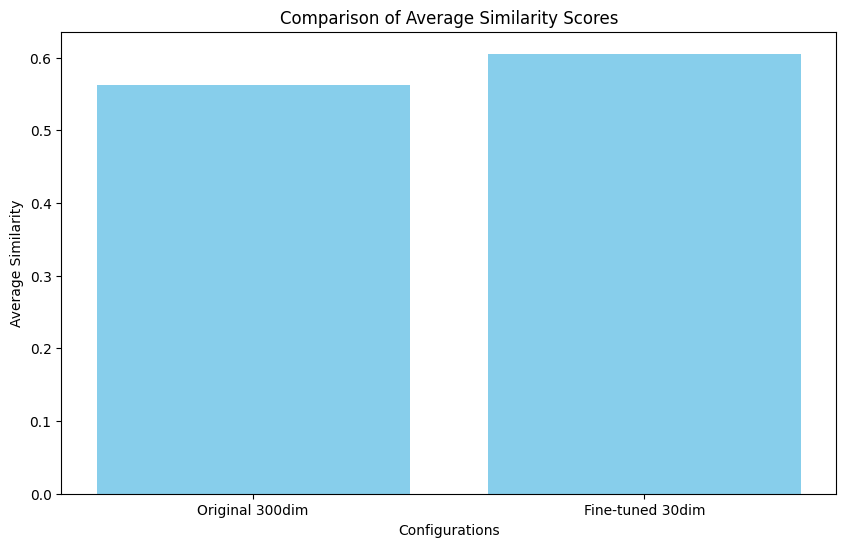

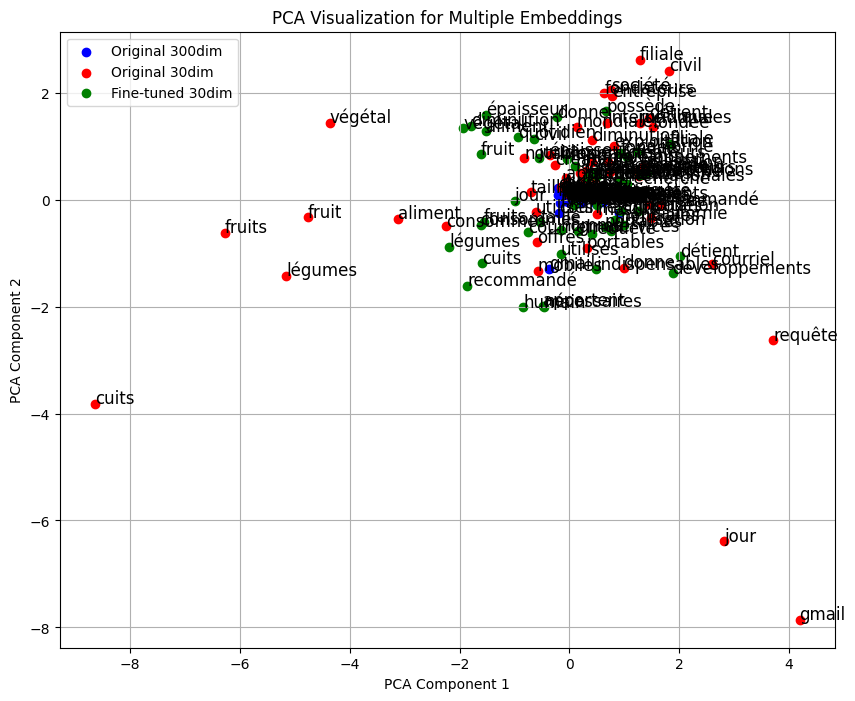

/Users/hdrrayan/Documents/COURS/GALATASARAY/Artificial Neural Networks/French-reducted-word-embedding/French-reducted-word-embedding/venv/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/Users/hdrrayan/Documents/COURS/GALATASARAY/Artificial Neural Networks/French-reducted-word-embedding/French-reducted-word-embedding/venv/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/Users/hdrrayan/Documents/COURS/GALATASARAY/Artificial Neural Networks/French-reducted-word-embedding/French-reducted-word-embedding/venv/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


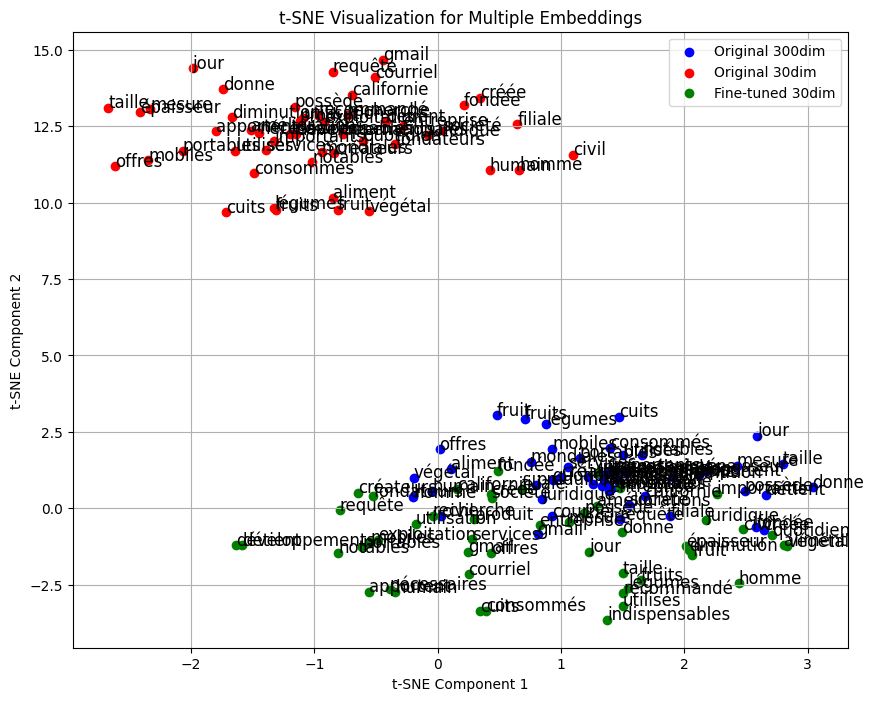

In [ ]:
plot_similarity_comparison([similarities_original_300dim_embeds, similarities_fineTuned_30dim_embeds], ["Original 300dim", "Fine-tuned 30dim"])
PCA_visualize_embeddings([dic_before_tuning_embeds_300dim, dic_before_tuning_embeds_30dim, dic_fine_tuned_embeds_30dim], wordsForPCA, ["Original 300dim", "Original 30dim", "Fine-tuned 30dim"], withLabels=True)
tSNE_visualize_embeddings([dic_before_tuning_embeds_300dim, dic_before_tuning_embeds_30dim, dic_fine_tuned_embeds_30dim], wordsForPCA, ["Original 300dim", "Original 30dim", "Fine-tuned 30dim"], withLabels=True)

Evaluating and plotting the embeddings... Please wait...


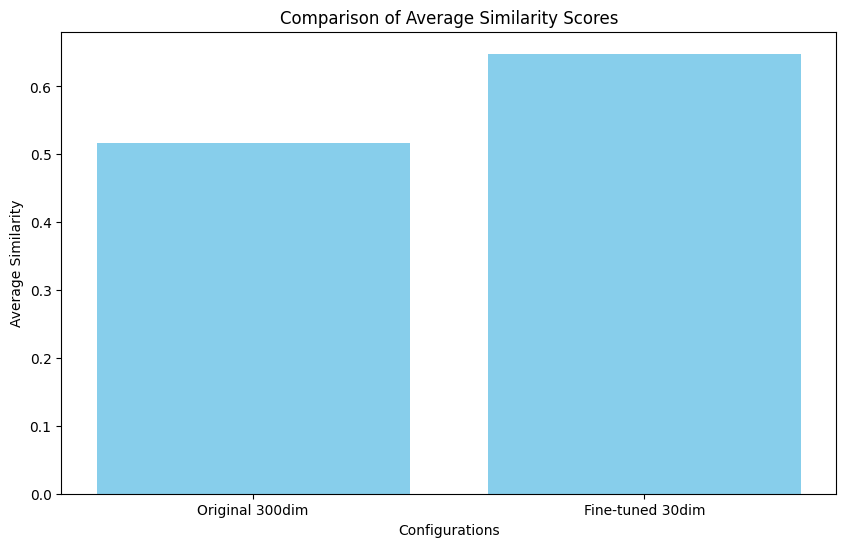

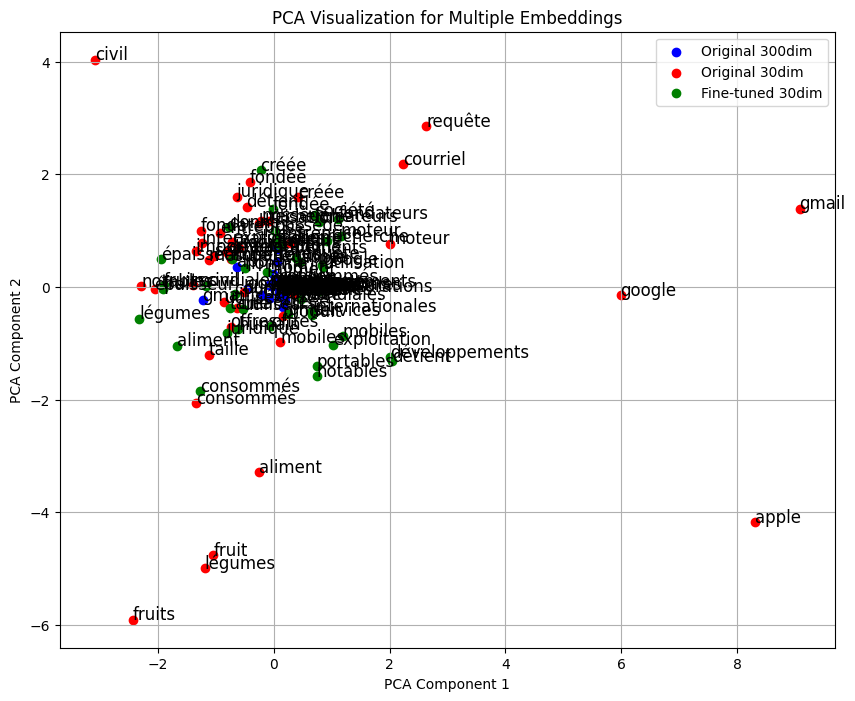

/Users/hdrrayan/Documents/COURS/GALATASARAY/Artificial Neural Networks/French-reducted-word-embedding/French-reducted-word-embedding/venv/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/Users/hdrrayan/Documents/COURS/GALATASARAY/Artificial Neural Networks/French-reducted-word-embedding/French-reducted-word-embedding/venv/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/Users/hdrrayan/Documents/COURS/GALATASARAY/Artificial Neural Networks/French-reducted-word-embedding/French-reducted-word-embedding/venv/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


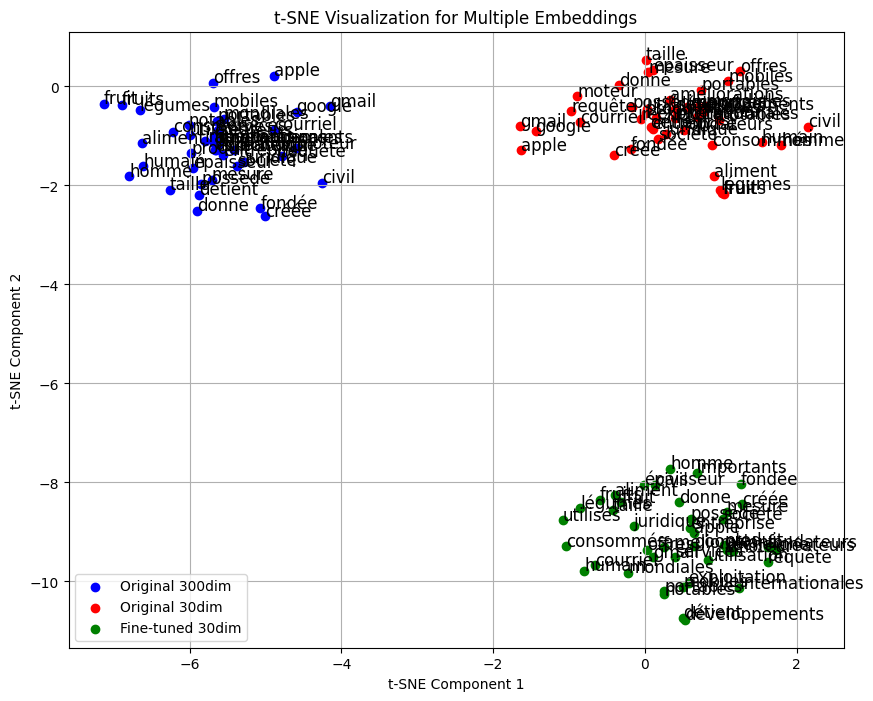

In [9]:
# Fetch the test data
# List of words to test similarity
wordsToTestSimilarity = [
    ("fruit", "aliment"), 
    ("consommés", "utilisés"), 
    ("humain", "homme"), 
    ("légumes", "fruits"), 
    ("google", "apple"),
    ("google", "moteur"),
    ("google", "recherche"),
    ("google", "entreprise"),
    ("entreprise", "société"),
    ("épaisseur", "taille"), 
    ("donne", "produit"), 
    ("mesure", "taille"), 
    ("civil", "juridique"),
    ("fondée", "créée"), 
    ("créateurs", "fondateurs"), 
    ("recherche", "requête"), 
    ("développements", "améliorations"), 
    ("détient", "possède"), 
    ("notables", "importants"), 
    ("exploitation", "utilisation"), 
    ("mobiles", "portables"), 
    ("services", "offres"), 
    ("gmail", "courriel"), 
    ("mondiales", "internationales") 
]

os.makedirs("data/comparaisonDataSet", exist_ok=True)
np.save(file="data/comparaisonDataSet/wordsToTestSimilarity.npy", arr=wordsToTestSimilarity)
wordsToTestSimilarity = np.load(file='data/comparaisonDataSet/wordsToTestSimilarity.npy', allow_pickle=True)
wordsForPCA = []
for word, w in wordsToTestSimilarity:
    if word not in wordsForPCA:
        wordsForPCA.append(word)
    if w not in wordsForPCA:
        wordsForPCA.append(w)

print("Evaluating and plotting the embeddings... Please wait...")
dic_before_tuning_embeds_30dim = np.load(allow_pickle=True, file="data/modelsSavedLocally/wikipedia/30dim_embeddings_DictWithWords.npy").item()
dic_before_tuning_embeds_300dim = np.load(allow_pickle=True, file="data/modelsSavedLocally/wikipedia/300dim_embeddings_DictWithWords.npy").item()
dic_fine_tuned_embeds_30dim = np.load(allow_pickle=True, file="data/modelsSavedLocally/wikipedia/Tuned30dim_embeddings_DictWithWords.npy").item()

similarities_original_300dim_embeds = evaluate_word_similarity(dic_before_tuning_embeds_300dim, wordsToTestSimilarity)
similarities_original_30dim_embeds = evaluate_word_similarity(dic_before_tuning_embeds_30dim, wordsToTestSimilarity)
similarities_fineTuned_30dim_embeds = evaluate_word_similarity(dic_fine_tuned_embeds_30dim, wordsToTestSimilarity)

plot_similarity_comparison([similarities_original_300dim_embeds, similarities_fineTuned_30dim_embeds], ["Original 300dim", "Fine-tuned 30dim"])
PCA_visualize_embeddings([dic_before_tuning_embeds_300dim, dic_before_tuning_embeds_30dim, dic_fine_tuned_embeds_30dim], wordsForPCA, ["Original 300dim", "Original 30dim", "Fine-tuned 30dim"], withLabels=True)


# Conclusion

#### Even though these are not extremely satisfying results because the 30 dimensions embeddings still don't give better results than the 300 dimensions ones, We are proud to say that for a 10x reduction, the results are promising. 

1. We can remark that a smaller reduction of x5 or x3 and a better fine-tuning (limited on our side by the size of the training data and the computational time needed) might surpass the Meta's FastText model for French language. Indeed, we had to early stop the training loop of the word2vec, but not because we were afraid of an overfitting, rather because it was taking too long time. We hence stop it at a mean_loss of around 5, when it could go to about 2. The decreasing is unfortunatly too slow.

2. We observe on the PCA plotting that our model rightly corrects some of the information lost during the reducing of the embeddings. The 300 dimensions though, are better at learning complex and more slight relationships, hence make a way better clustering.

3. We can observe some interesting clusters on our trained model though : for instance a cluster with "indispensables", "utilisés", and "recommandés".

4. We see on the cosine-similarity that the words are closer semanticly from one another, which was the purpose of the fine-tuning.

5. For comparaison and plotting, we couldn't take datasets from state-of-the-art websites, because our training never went above 20.000 words, which led to way too missing words compared to the dataset. We instead generated from NLP models (GPT4o and Gemini 1.5 Flash) similar word pairs by giving them the training corpus.

6. For the AutoEncoder training process, we documented everything on the "Part2_AutoEncoderTraining.ipynb" notebook. We indeed understood the challenge of getting better results than 300 dimensions with only 30 dimensions, so we wanted to have the most optimal reduction possible, in order to have less work on the fine-tuning part. To do so, we tested various hyperparameter combinations and compared them all to keep the best one.